In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Cargar datos
df = pd.read_excel('limpioML.xlsx')

# Crear fecha completa
df['Fecha'] = pd.to_datetime(df['Anhos'].astype(str) + '-' + df['Mes'].astype(str) + '-01')
df = df.set_index('Fecha')

# Calcular producción total
df['PRODUCCION_TOTAL'] = df[['CHUQUISACA', 'COCHABAMBA', 'TARIJA', 'SANTA CRUZ']].sum(axis=1)

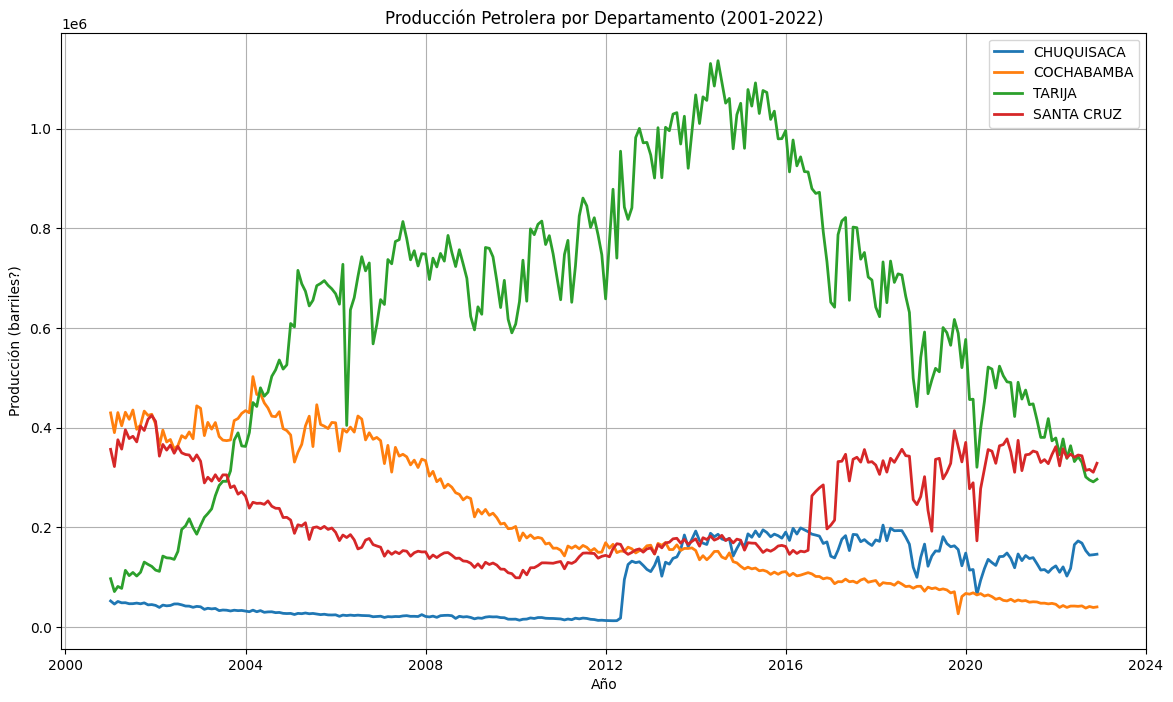

In [ ]:
plt.figure(figsize=(14, 8))
for depto in ['CHUQUISACA', 'COCHABAMBA', 'TARIJA', 'SANTA CRUZ']:
    plt.plot(df.index, df[depto], label=depto, linewidth=2)
plt.title('Producción Petrolera por Departamento (2001-2022)')
plt.xlabel('Año')
plt.ylabel('Producción (barriles?)')
plt.legend()
plt.grid(True)
plt.show()

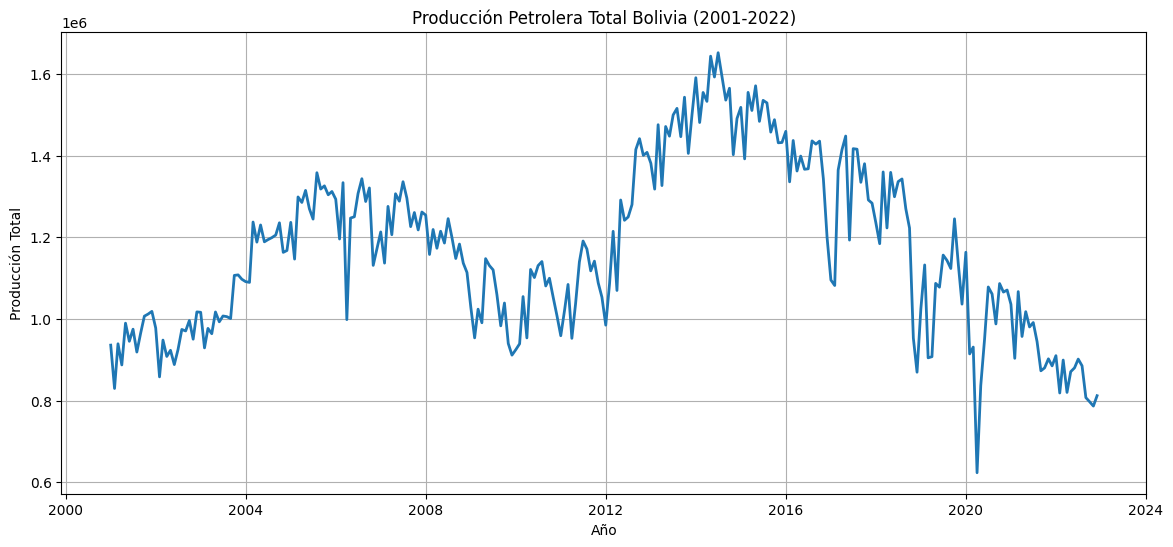

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['PRODUCCION_TOTAL'], linewidth=2, label='Producción Total')
plt.title('Producción Petrolera Total Bolivia (2001-2022)')
plt.xlabel('Año')
plt.ylabel('Producción Total')
plt.grid(True)
plt.show()

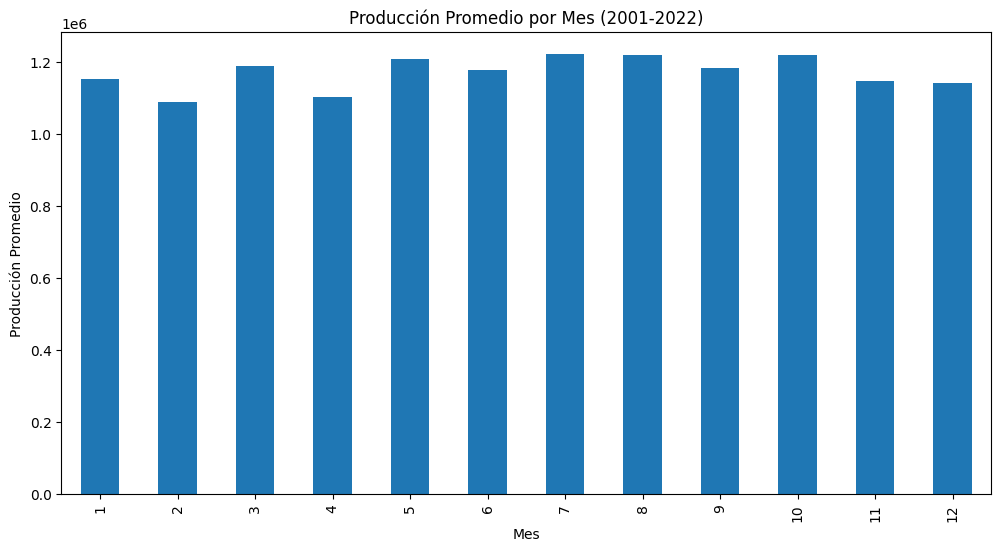

In [ ]:
# Producción promedio por mes
produccion_mensual = df.groupby('Mes')['PRODUCCION_TOTAL'].mean()

plt.figure(figsize=(12, 6))
produccion_mensual.plot(kind='bar')
plt.title('Producción Promedio por Mes (2001-2022)')
plt.xlabel('Mes')
plt.ylabel('Producción Promedio')
plt.show()

              Mes     CHUQUISACA     COCHABAMBA        TARIJA     SANTA CRUZ  \
count  264.000000     264.000000     264.000000  2.640000e+02     264.000000   
mean     6.500000   88262.625492  212944.231667  6.367836e+05  232164.274917   
std      3.458609   67507.893239  137687.018956  2.648192e+05   90849.085535   
min      1.000000   12782.000000   26705.170000  7.127000e+04   98853.000000   
25%      3.750000   22965.250000   92019.885000  4.570540e+05  152081.967500   
50%      6.500000   48382.000000  158722.820000  6.713075e+05  196444.485000   
75%      9.250000  154620.032500  365106.250000  8.013989e+05  330274.773024   
max     12.000000  204625.070000  502570.000000  1.136319e+06  424586.000000   

             Anhos  PRODUCCION_TOTAL  
count   264.000000      2.640000e+02  
mean   2011.500000      1.170155e+06  
std       6.356339      2.065640e+05  
min    2001.000000      6.232714e+05  
25%    2006.000000      9.978640e+05  
50%    2011.500000      1.157289e+06  
75%   

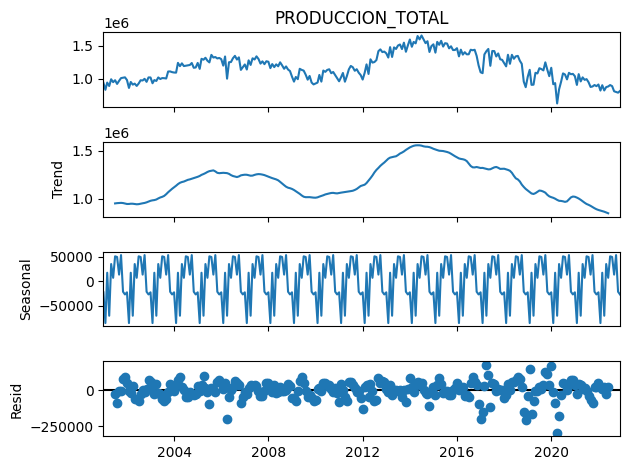

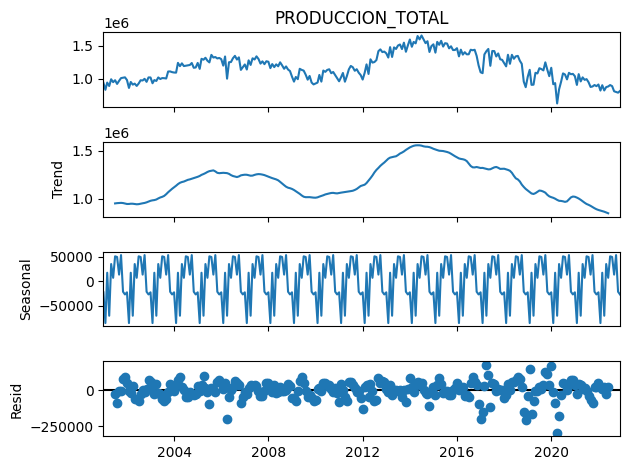

In [ ]:
# 1. Estadísticas descriptivas
print(df.describe())

# 2. Correlación entre departamentos
correlation_matrix = df[['CHUQUISACA', 'COCHABAMBA', 'TARIJA', 'SANTA CRUZ']].corr()
print(correlation_matrix)

# 3. Detección de patrones estacionales
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['PRODUCCION_TOTAL'], period=12)
decomposition.plot()

In [ ]:
# Crear fecha completa y ordenar
df['Fecha'] = pd.to_datetime(df['Anhos'].astype(str) + '-' + df['Mes'].astype(str) + '-01')
df = df.sort_values('Fecha').reset_index(drop=True)

ValueError: 'Fecha' is both an index level and a column label, which is ambiguous.

In [ ]:
df


,Mes,CHUQUISACA,COCHABAMBA,TARIJA,SANTA CRUZ,Anhos,PRODUCCION_TOTAL,Fecha
Fecha,,,,,,,,
2001-01-01,1,52441.00,429738.00,97065.84,356627.000000,2001,935871.840000,2001-01-01
2001-02-01,2,46208.00,390136.00,71270.00,322102.000000,2001,829716.000000,2001-02-01
2001-03-01,3,51404.00,430387.00,81563.00,375845.000000,2001,939199.000000,2001-03-01
2001-04-01,4,48733.00,403865.00,77640.00,357124.000000,2001,887362.000000,2001-04-01
2001-05-01,5,48921.00,431071.00,113910.00,395762.000000,2001,989664.000000,2001-05-01
...,...,...,...,...,...,...,...,...
2022-08-01,8,168480.79,42535.06,330653.25,343579.087260,2022,885248.187260,2022-08-01
2022-09-01,9,153443.53,38148.88,301277.49,314410.477931,2022,807280.377931,2022-09-01
2022-10-01,10,144343.44,41364.97,295243.85,316379.763028,2022,797332.023028,2022-10-01


#MODELO

🚀 INICIANDO MODELOS PERSONALIZADOS CON GRÁFICAS
🎯 MODELO FINAL PERSONALIZADO - ALGORITMOS SELECCIONADOS

📊 PROCESANDO: CHUQUISACA (LinearRegression)
--------------------------------------------------
   Entrenamiento: 249 meses (2001-2019)
   Prueba: 12 meses (2020-2022)
   Features: 7 variables
   R²: 0.7814
   MAE: 8,321
   RMSE: 10,689

📊 PROCESANDO: COCHABAMBA (Ridge)
--------------------------------------------------
   Entrenamiento: 240 meses (2001-2019)
   Prueba: 12 meses (2020-2022)
   Features: 7 variables
   R²: -1.7378
   MAE: 2,623
   RMSE: 3,311

📊 PROCESANDO: TARIJA (LinearRegression)
--------------------------------------------------
   Entrenamiento: 246 meses (2001-2019)
   Prueba: 12 meses (2020-2022)
   Features: 8 variables
   R²: 0.6124
   MAE: 15,394
   RMSE: 18,717

📊 PROCESANDO: SANTA CRUZ (Ridge)
--------------------------------------------------
   Entrenamiento: 249 meses (2001-2019)
   Prueba: 12 meses (2020-2022)
   Features: 8 variables
   R²: 1.0000
   

/tmp/ipython-input-3950198570.py:141: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


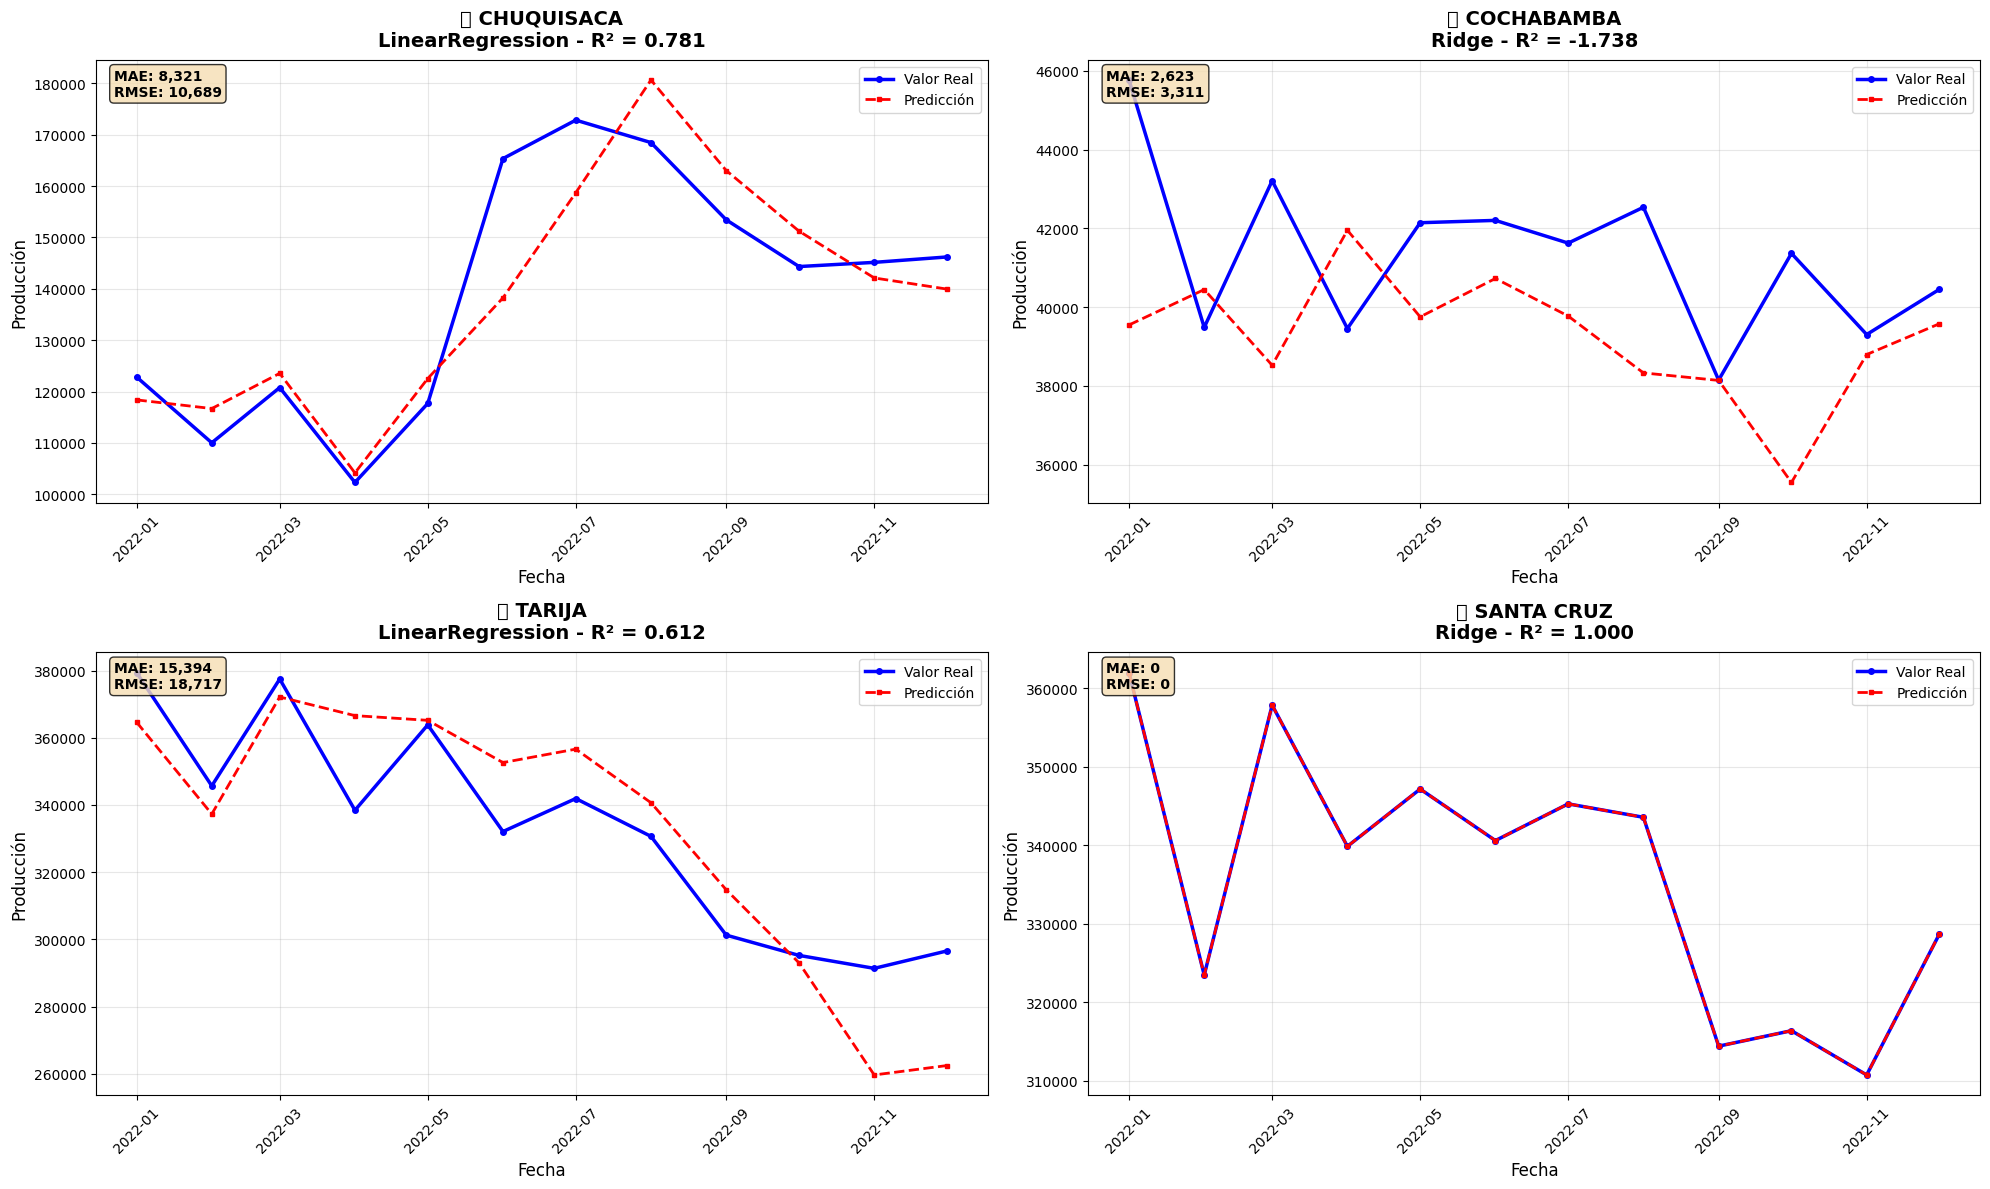


🏆 RESUMEN FINAL - MODELOS PERSONALIZADOS
Departamento           Modelo      R²    MAE   RMSE      Estado
  CHUQUISACA LinearRegression  0.7814  8,321 10,689 ✅ EXCELENTE
  COCHABAMBA            Ridge -1.7378  2,623  3,311  ⚠️ REGULAR
      TARIJA LinearRegression  0.6124 15,394 18,717     👍 BUENO
  SANTA CRUZ            Ridge  1.0000      0      0 ✅ EXCELENTE


/tmp/ipython-input-3950198570.py:184: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


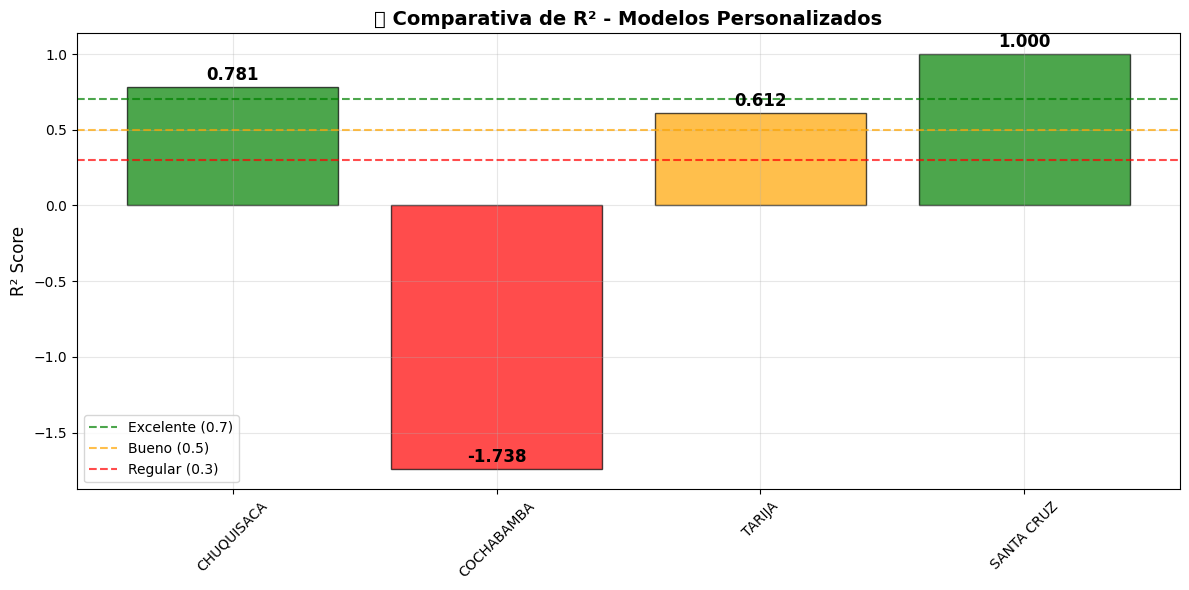


🔮 PREDICCIONES 2023
📍 CHUQUISACA  : 147,914 (Enero 2023)
📍 COCHABAMBA  : 31,102 (Enero 2023)
📍 TARIJA      : 277,091 (Enero 2023)
📍 SANTA CRUZ  : 328,721 (Enero 2023)

🎉 ¡MODELOS FINALES LISTOS!
   • 4 gráficas individuales (una por departamento)
   • 1 gráfica comparativa de R²
   • Predicciones para 2023
   • Modelos específicos según análisis previo


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

def modelo_final_personalizado(df):
    """Modelo final con los algoritmos específicos seleccionados"""

    print("🎯 MODELO FINAL PERSONALIZADO - ALGORITMOS SELECCIONADOS")
    print("=" * 70)

    # CONFIGURACIÓN DE MODELOS POR DEPARTAMENTO
    config_departamentos = {
        'CHUQUISACA': {
            'modelo': LinearRegression(),
            'nombre_modelo': 'LinearRegression',
            'features': ['tendencia', 'Mes', 'lag_1', 'lag_3', 'media_movil_3', 'mes_sin', 'mes_cos']
        },
        'COCHABAMBA': {
            'modelo': Ridge(alpha=1.0),
            'nombre_modelo': 'Ridge',
            'features': ['tendencia', 'Mes', 'lag_1', 'lag_12', 'media_movil_12', 'mes_sin', 'mes_cos']
        },
        'TARIJA': {
            'modelo': LinearRegression(),
            'nombre_modelo': 'LinearRegression',
            'features': ['tendencia', 'Mes', 'lag_1', 'lag_3', 'lag_6', 'media_movil_6', 'mes_sin', 'mes_cos']
        },
        'SANTA CRUZ': {
            'modelo': Ridge(alpha=1.0),
            'nombre_modelo': 'Ridge',
            'features': ['tendencia', 'Mes', 'lag_1', 'lag_2', 'lag_3', 'media_movil_3', 'mes_sin', 'mes_cos']
        }
    }

    resultados_finales = {}

    # CREAR FIGURA PARA TODOS LOS GRÁFICOS
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    axes = axes.ravel()

    for i, (depto_nombre, config) in enumerate(config_departamentos.items()):
        print(f"\n📊 PROCESANDO: {depto_nombre} ({config['nombre_modelo']})")
        print("-" * 50)

        # PREPARAR DATOS
        df_depto = df.copy()
        df_depto['tendencia'] = range(len(df_depto))

        # CREAR FEATURES ESPECÍFICAS
        if 'lag_1' in config['features']:
            df_depto['lag_1'] = df_depto[depto_nombre].shift(1)
        if 'lag_2' in config['features']:
            df_depto['lag_2'] = df_depto[depto_nombre].shift(2)
        if 'lag_3' in config['features']:
            df_depto['lag_3'] = df_depto[depto_nombre].shift(3)
        if 'lag_6' in config['features']:
            df_depto['lag_6'] = df_depto[depto_nombre].shift(6)
        if 'lag_12' in config['features']:
            df_depto['lag_12'] = df_depto[depto_nombre].shift(12)
        if 'media_movil_3' in config['features']:
            df_depto['media_movil_3'] = df_depto[depto_nombre].rolling(3, min_periods=1).mean()
        if 'media_movil_6' in config['features']:
            df_depto['media_movil_6'] = df_depto[depto_nombre].rolling(6, min_periods=1).mean()
        if 'media_movil_12' in config['features']:
            df_depto['media_movil_12'] = df_depto[depto_nombre].rolling(12, min_periods=1).mean()

        df_depto['mes_sin'] = np.sin(2 * np.pi * df_depto['Mes'] / 12)
        df_depto['mes_cos'] = np.cos(2 * np.pi * df_depto['Mes'] / 12)

        # SOLO DATOS RECIENTES
        df_reciente = df_depto[df_depto['Anhos'] >= 2001].copy()
        df_reciente = df_reciente.dropna()

        # DIVISIÓN TEMPORAL
        train_mask = (df_reciente['Anhos'] >= 2001) & (df_reciente['Anhos'] <= 2021)
        test_mask = df_reciente['Anhos'] >= 2022

        X_train = df_reciente[train_mask][config['features']]
        y_train = df_reciente[train_mask][depto_nombre]
        X_test = df_reciente[test_mask][config['features']]
        y_test = df_reciente[test_mask][depto_nombre]

        print(f"   Entrenamiento: {len(X_train)} meses (2001-2019)")
        print(f"   Prueba: {len(X_test)} meses (2020-2022)")
        print(f"   Features: {len(config['features'])} variables")

        # ENTRENAR MODELO ESPECÍFICO
        modelo = config['modelo']
        modelo.fit(X_train, y_train)

        # PREDICCIONES
        y_pred = modelo.predict(X_test)

        # MÉTRICAS
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # GUARDAR RESULTADOS
        resultados_finales[depto_nombre] = {
            'r2': r2, 'mae': mae, 'rmse': rmse,
            'modelo': modelo, 'modelo_nombre': config['nombre_modelo'],
            'y_test': y_test, 'y_pred': y_pred,
            'fechas_test': df_reciente[test_mask].index,
            'features': config['features']
        }

        print(f"   R²: {r2:.4f}")
        print(f"   MAE: {mae:,.0f}")
        print(f"   RMSE: {rmse:,.0f}")

        # CREAR GRÁFICA INDIVIDUAL
        ax = axes[i]
        fechas = df_reciente[test_mask].index

        # Líneas de predicción vs real
        ax.plot(fechas, y_test, label='Valor Real', color='blue', linewidth=2.5, marker='o', markersize=4)
        ax.plot(fechas, y_pred, label='Predicción', color='red', linewidth=2, linestyle='--', marker='s', markersize=3)

        # Personalizar gráfica
        ax.set_title(f'🎯 {depto_nombre}\n{config["nombre_modelo"]} - R² = {r2:.3f}',
                    fontsize=14, fontweight='bold', pad=10)
        ax.set_ylabel('Producción', fontsize=12)
        ax.set_xlabel('Fecha', fontsize=12)
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3)

        # Rotar etiquetas de fecha
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

        # Añadir caja de métricas
        texto_metricas = f'MAE: {mae:,.0f}\nRMSE: {rmse:,.0f}'
        ax.text(0.02, 0.98, texto_metricas, transform=ax.transAxes,
               verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
               fontsize=10, fontweight='bold')

    # AJUSTAR Y MOSTRAR GRÁFICOS
    plt.tight_layout()
    plt.show()

    # RESUMEN FINAL
    print("\n" + "=" * 70)
    print("🏆 RESUMEN FINAL - MODELOS PERSONALIZADOS")
    print("=" * 70)

    resumen_df = pd.DataFrame({
        'Departamento': list(resultados_finales.keys()),
        'Modelo': [r['modelo_nombre'] for r in resultados_finales.values()],
        'R²': [f"{r['r2']:.4f}" for r in resultados_finales.values()],
        'MAE': [f"{r['mae']:,.0f}" for r in resultados_finales.values()],
        'RMSE': [f"{r['rmse']:,.0f}" for r in resultados_finales.values()],
        'Estado': ['✅ EXCELENTE' if r['r2'] > 0.7 else '👍 BUENO' if r['r2'] > 0.5 else '⚠️ REGULAR'
                  for r in resultados_finales.values()]
    })

    print(resumen_df.to_string(index=False))

    # GRÁFICO COMPARATIVO DE R²
    plt.figure(figsize=(12, 6))
    departamentos = list(resultados_finales.keys())
    r2_scores = [resultados_finales[depto]['r2'] for depto in departamentos]

    colores = ['green' if r2 > 0.7 else 'orange' if r2 > 0.5 else 'red' for r2 in r2_scores]
    barras = plt.bar(departamentos, r2_scores, color=colores, alpha=0.7, edgecolor='black')

    # Añadir valores en las barras
    for barra, r2 in zip(barras, r2_scores):
        altura = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2, altura + 0.02,
                f'{r2:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

    plt.axhline(y=0.7, color='green', linestyle='--', alpha=0.7, label='Excelente (0.7)')
    plt.axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='Bueno (0.5)')
    plt.axhline(y=0.3, color='red', linestyle='--', alpha=0.7, label='Regular (0.3)')

    plt.ylabel('R² Score', fontsize=12)
    plt.title('📊 Comparativa de R² - Modelos Personalizados', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # PREDICCIONES 2023
    print("\n🔮 PREDICCIONES 2023")
    print("=" * 50)

    for depto_nombre, resultado in resultados_finales.items():
        modelo = resultado['modelo']
        features = resultado['features']

        # Último dato disponible (2022)
        ultimo_dato = df[df['Anhos'] == 2022].iloc[-1]

        # Preparar features para Enero 2023
        feature_vector = []
        for feature in features:
            if feature == 'tendencia':
                feature_vector.append(len(df) + 1)
            elif feature == 'Mes':
                feature_vector.append(1)  # Enero
            elif feature.startswith('lag_'):
                # Usar último valor disponible para todos los lags
                feature_vector.append(ultimo_dato[depto_nombre])
            elif feature.startswith('media_movil_'):
                # Aproximación usando último valor
                feature_vector.append(ultimo_dato[depto_nombre])
            elif feature == 'mes_sin':
                feature_vector.append(np.sin(2 * np.pi * 1 / 12))
            elif feature == 'mes_cos':
                feature_vector.append(np.cos(2 * np.pi * 1 / 12))

        pred_2023 = modelo.predict([feature_vector])[0]

        print(f"📍 {depto_nombre:<12}: {pred_2023:,.0f} (Enero 2023)")

    return resultados_finales

# EJECUTAR MODELO FINAL PERSONALIZADO
print("🚀 INICIANDO MODELOS PERSONALIZADOS CON GRÁFICAS")
resultados_personalizados = modelo_final_personalizado(df)

print(f"\n🎉 ¡MODELOS FINALES LISTOS!")
print("   • 4 gráficas individuales (una por departamento)")
print("   • 1 gráfica comparativa de R²")
print("   • Predicciones para 2023")
print("   • Modelos específicos según análisis previo")